In [1]:
import pandas as pd
import chart_studio.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
import json
import os
import matplotlib.pyplot as plt

In [2]:
dataset_forecast = pd.read_csv('C:\\Users\\souja\\Desktop\\codechef_covid19\\datasets\\covid19-global-forecasting-week-1\\train.csv')

In [3]:
dataset_forecast.head()

Id Province/State Country/Region   Lat  Long        Date  ConfirmedCases  \
0   1            NaN    Afghanistan  33.0  65.0  2020-01-22             0.0   
1   2            NaN    Afghanistan  33.0  65.0  2020-01-23             0.0   
2   3            NaN    Afghanistan  33.0  65.0  2020-01-24             0.0   
3   4            NaN    Afghanistan  33.0  65.0  2020-01-25             0.0   
4   5            NaN    Afghanistan  33.0  65.0  2020-01-26             0.0   

   Fatalities  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [4]:
#countries
dataset_forecast['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guadeloupe',
       'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Holy See',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia

In [5]:
dataset_forecast.dropna()['Country/Region'].unique()

array(['Australia', 'Canada', 'China', 'Cruise Ship', 'Denmark', 'France',
       'Netherlands', 'US', 'United Kingdom'], dtype=object)

## Ploting based on the severity of confirmed active on the based of latest date

In [6]:
max(dataset_forecast['Date'])

'2020-03-23'

In [7]:
data_china = dataset_forecast[dataset_forecast['Date'] == max(dataset_forecast['Date'])][dataset_forecast['Country/Region'] == 'China']

c:\users\souja\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [8]:
data_china.head()

Id Province/State Country/Region      Lat      Long        Date  \
2975  4433          Anhui          China  31.8257  117.2264  2020-03-23   
3037  4526        Beijing          China  40.1824  116.4142  2020-03-23   
3099  4619      Chongqing          China  30.0572  107.8740  2020-03-23   
3161  4712         Fujian          China  26.0789  117.9874  2020-03-23   
3223  4805          Gansu          China  37.8099  101.0583  2020-03-23   

      ConfirmedCases  Fatalities  
2975           990.0         6.0  
3037           537.0         8.0  
3099           577.0         6.0  
3161           313.0         1.0  
3223           136.0         2.0

In [9]:
data_china_to_plot = data_china[['Province/State','ConfirmedCases','Fatalities']]

In [10]:
data_china_to_plot.head()

Province/State  ConfirmedCases  Fatalities
2975          Anhui           990.0         6.0
3037        Beijing           537.0         8.0
3099      Chongqing           577.0         6.0
3161         Fujian           313.0         1.0
3223          Gansu           136.0         2.0

In [11]:
data_china_to_plot['Active'] = data_china_to_plot['ConfirmedCases'] - data_china_to_plot['Fatalities']

c:\users\souja\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
data_china_to_plot

Province/State  ConfirmedCases  Fatalities   Active
2975           Anhui           990.0         6.0    984.0
3037         Beijing           537.0         8.0    529.0
3099       Chongqing           577.0         6.0    571.0
3161          Fujian           313.0         1.0    312.0
3223           Gansu           136.0         2.0    134.0
3285       Guangdong          1415.0         8.0   1407.0
3347         Guangxi           254.0         2.0    252.0
3409         Guizhou           146.0         2.0    144.0
3471          Hainan           168.0         6.0    162.0
3533           Hebei           319.0         6.0    313.0
3595    Heilongjiang             0.0         0.0      0.0
3657           Henan             0.0         0.0      0.0
3719       Hong Kong           356.0         4.0    352.0
3781           Hubei         67800.0      3153.0  64647.0
3843           Hunan          1018.0         4.0   1014.0
3905  Inner Mongolia            75.0         1.0     74.0
3967         Jiangsu           633.0         0.0    633.0
4029         Jiangxi           936.0         1.0    935.0
4091           Jilin            93.0         1.0     92.0
4153        Liaoning           127.0         2.0    125.0
4215           Macau            24.0         0.0     24.0
4277         Ningxia            75.0         0.0     75.0
4339         Qinghai            18.0         0.0     18.0
4401         Shaanxi           248.0         3.0    245.0
4463        Shandong           768.0         7.0    761.0
4525        Shanghai             0.0         0.0      0.0
4587          Shanxi           133.0         0.0    133.0
4649         Sichuan           543.0         3.0    540.0
4711         Tianjin           141.0         3.0    138.0
4773           Tibet             1.0         0.0      1.0
4835        Xinjiang            76.0         3.0     73.0
4897          Yunnan             0.0         0.0      0.0
4959        Zhejiang          1238.0         1.0   1237.0

In [13]:
with open(os.getcwd()+'\\extras\\china\\geojson_china.json') as f:
  map_china = json.load(f)

##### Active

In [14]:
fig = go.Figure(go.Choroplethmapbox(geojson=map_china,locations=data_china_to_plot['Province/State'],z=data_china_to_plot['Active'],
                                    colorscale='sunsetdark',
                                    marker_opacity=0.5, marker_line_width=0,colorbar={'title':"No. of Active Cases"}))

In [15]:
fig = fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 35.8617, "lon": 104.1954})
fig = fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [16]:
fig.write_image('image.png')

ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    c:\users\souja\appdata\local\programs\python\python37\lib\site-packages\pywin32_system32
    c:\users\souja\appdata\local\programs\python\python37\lib\site-packages\pywin32_system32
    c:\users\souja\appdata\local\programs\python\python37\lib\site-packages\pywin32_system32
    C:\Program Files (x86)\Common Files\Oracle\Java\javapath
    C:\Python27\
    C:\Python27\Scripts
    C:\Windows\system32
    C:\Windows
    C:\Windows\System32\Wbem
    C:\Windows\System32\WindowsPowerShell\v1.0\
    C:\Windows\System32\OpenSSH\
    C:\Program Files\nodejs\
    C:\ProgramData\chocolatey\bin
    C:\Program Files\Git\cmd
    C:\Program Files\Git\mingw64\bin
    C:\Program Files\Git\usr\bin
    C:\Users\souja\AppData\Local\Programs\Python\Python37\Scripts\
    C:\Users\souja\AppData\Local\Programs\Python\Python37\
    C:\Users\souja\AppData\Local\Microsoft\WindowsApps
    C:\Users\souja\AppData\Roaming\npm
    C:\Users\souja\AppData\Local\Programs\Microsoft VS Code\bin
    C:\Program Files\Java\jdk-13\bin
    C:\Program Files (x86)\Minimal ADB and Fastboot
    C:\adb
    C:\Users\souja\AppData\Local\Programs\Python\Python37\Scripts\
    C:\Users\souja\AppData\Local\Programs\Python\Python37\
    C:\Users\souja\AppData\Local\Microsoft\WindowsApps
    C:\Users\souja\AppData\Roaming\npm
    C:\Users\souja\AppData\Local\Programs\Microsoft VS Code\bin
    C:\Program Files\Java\jdk-13\bin
    C:\Program Files (x86)\Minimal ADB and Fastboot
    C:\MinGW\bin
    D:\Softwares_run\Android_Sdk
    D:\Softwares_run\Android_Sdk\platform-tools
    D:\Softwares_run\Android_Sdk\tools
    D:\Softwares_run\flutter\bin
    C:\Program Files (x86)\Dev-Cpp\
    C:\Program Files (x86)\Graphviz2.38\bin\
    
    c:\users\souja\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python


##### Deaths

In [18]:
fig = go.Figure(go.Choroplethmapbox(geojson=map_china,locations=data_china_to_plot['Province/State'],z=data_china_to_plot['Fatalities'],
                                    colorscale='sunsetdark',
                                    marker_opacity=0.5, marker_line_width=0,colorbar={'title':"No. of Active Cases"}))

In [19]:
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 35.8617, "lon": 104.1954})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

#### Creating Cluster for China

In [20]:
from sklearn.cluster import KMeans

In [21]:
### cluster for the diseases
### 3 - not likely unsafe 1 - unsafe 0 - likely unsafe
model = KMeans(n_clusters=3)
model.fit(data_china_to_plot['Active'].values.reshape(-1,1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
model.cluster_centers_

array([[  121.22727273],
       [64647.        ],
       [  861.1       ]])

In [25]:
data_china_all = dataset_forecast[dataset_forecast['Country/Region'] == 'China']

In [26]:
data_china_all

Id Province/State Country/Region      Lat      Long        Date  \
2914  4372          Anhui          China  31.8257  117.2264  2020-01-22   
2915  4373          Anhui          China  31.8257  117.2264  2020-01-23   
2916  4374          Anhui          China  31.8257  117.2264  2020-01-24   
2917  4375          Anhui          China  31.8257  117.2264  2020-01-25   
2918  4376          Anhui          China  31.8257  117.2264  2020-01-26   
...    ...            ...            ...      ...       ...         ...   
4955  7405       Zhejiang          China  29.1832  120.0934  2020-03-19   
4956  7406       Zhejiang          China  29.1832  120.0934  2020-03-20   
4957  7407       Zhejiang          China  29.1832  120.0934  2020-03-21   
4958  7408       Zhejiang          China  29.1832  120.0934  2020-03-22   
4959  7409       Zhejiang          China  29.1832  120.0934  2020-03-23   

      ConfirmedCases  Fatalities  
2914             1.0         0.0  
2915             9.0         0.0  
2916            15.0         0.0  
2917            39.0         0.0  
2918            60.0         0.0  
...              ...         ...  
4955          1233.0         1.0  
4956          1234.0         1.0  
4957          1236.0         1.0  
4958          1237.0         1.0  
4959          1238.0         1.0  

[2046 rows x 8 columns]

In [27]:
data_china_all['Active'] = data_china_all['ConfirmedCases'] - data_china_all['Fatalities']

c:\users\souja\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
data_china_all = data_china_all.drop(['Province/State','Country/Region','Lat','Long','ConfirmedCases','Id'],axis=1)

In [39]:
data_china_all = data_china_all.groupby('Date').sum().reset_index()

In [51]:
fig = plt.figure(figsize=(150,150))
plt.plot(data_china_all['Date'],data_china_all['Active'])

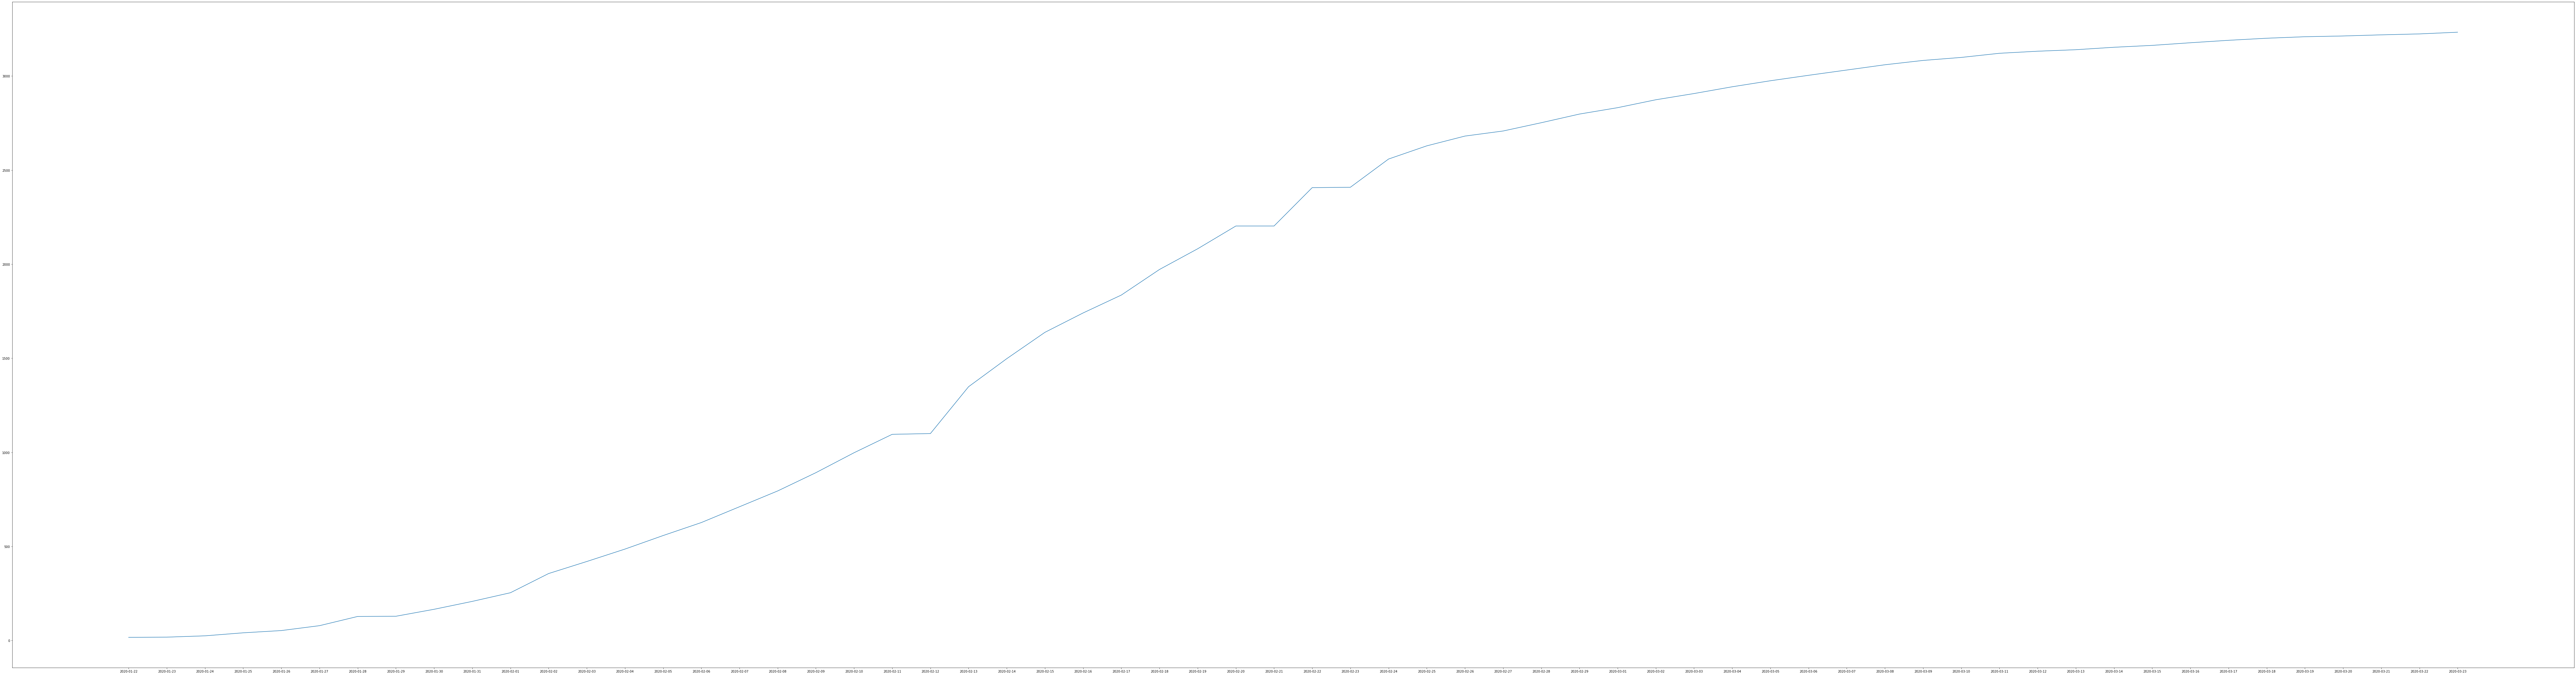

In [52]:
fig = plt.figure(figsize=(150,40))
plt.plot(data_china_all['Date'],data_china_all['Fatalities'])

#### India

In [72]:
data_india = pd.read_csv(os.getcwd()+'\\datasets\\india\\india.csv')

In [73]:
data_india

Date Name of State / UT  Total Confirmed cases (Indian National)  \
0    2020-01-30             Kerala                                        1   
1    2020-01-31             Kerala                                        1   
2    2020-02-01             Kerala                                        2   
3    2020-02-02             Kerala                                        3   
4    2020-02-03             Kerala                                        3   
..          ...                ...                                      ...   
608  2020-04-03         Tamil Nadu                                        0   
609  2020-04-03          Telengana                                        0   
610  2020-04-03      Uttar Pradesh                                        0   
611  2020-04-03        Uttarakhand                                        0   
612  2020-04-03        West Bengal                                        0   

     Total Confirmed cases ( Foreign National )  Cured/Discharged/Migrated  \
0                                             0                          0   
1                                             0                          0   
2                                             0                          0   
3                                             0                          0   
4                                             0                          0   
..                                          ...                        ...   
608                                           0                          6   
609                                           0                          1   
610                                           0                         14   
611                                           0                          2   
612                                           0                          3   

     Latitude  Longitude  Death  Total Confirmed cases  
0     10.8505    76.2711      0                      1  
1     10.8505    76.2711      0                      1  
2     10.8505    76.2711      0                      2  
3     10.8505    76.2711      0                      3  
4     10.8505    76.2711      0                      3  
..        ...        ...    ...                    ...  
608   11.1271    78.6569      1                    309  
609   18.1124    79.0193      3                    107  
610   26.8467    80.9462      2                    113  
611   30.0668    79.0193      0                     10  
612   22.9868    87.8550      3                     53  

[613 rows x 9 columns]

In [107]:
data_india_to_plot = data_india[data_india['Date'] == max(data_india['Date'])]

In [108]:
data_india_to_plot = data_india_to_plot.drop(['Date','Total Confirmed cases (Indian National)','Total Confirmed cases ( Foreign National )','Cured/Discharged/Migrated','Latitude','Longitude'],axis=1)

In [109]:
data_india_to_plot['Active'] = data_india_to_plot['Total Confirmed cases'] - data_india_to_plot['Death']

In [110]:
data_india_to_plot

Name of State / UT  Death  Total Confirmed cases  Active
583  Andaman and Nicobar Islands      0                     10      10
584               Andhra Pradesh      1                    132     131
585            Arunachal Pradesh      0                      1       1
586                        Assam      0                     16      16
587                        Bihar      1                     24      23
588                   Chandigarh      0                     18      18
589                 Chhattisgarh      0                      9       9
590                        Delhi      4                    219     215
591                          Goa      0                      6       6
592                      Gujarat      7                     87      80
593                      Haryana      0                     43      43
594             Himachal Pradesh      1                      6       5
595            Jammu and Kashmir      2                     70      68
596                    Jharkhand      0                      2       2
597                    Karnataka      3                    124     121
598                       Kerala      2                    286     284
599                       Ladakh      0                     14      14
600               Madhya Pradesh      6                     99      93
601                  Maharashtra     16                    335     319
602                      Manipur      0                      2       2
603                      Mizoram      0                      1       1
604                       Odisha      0                      5       5
605                   Puducherry      0                      3       3
606                       Punjab      4                     46      42
607                    Rajasthan      0                    133     133
608                   Tamil Nadu      1                    309     308
609                    Telengana      3                    107     104
610                Uttar Pradesh      2                    113     111
611                  Uttarakhand      0                     10      10
612                  West Bengal      3                     53      50

In [111]:
with open(os.getcwd()+'\\extras\\india\\india.json') as f:
  map_ind = json.load(f)

In [115]:
fig = go.Figure(go.Choroplethmapbox(geojson=map_ind,locations=data_india_to_plot['Name of State / UT'].values,z=data_india_to_plot['Active'].values,
                                    colorscale='sunsetdark',
                                    marker_opacity=0.5, marker_line_width=0,colorbar={'title':"No. of Active Cases"}))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 28.49401, "lon": 81.837451})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [114]:
data_india_to_plot['Name of State / UT'].values

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Mizoram', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telengana', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

### Creating the same for other countries

#### Australia

In [119]:
data_aus = dataset_forecast[dataset_forecast['Date'] == max(dataset_forecast['Date'])][dataset_forecast['Country/Region'] == 'Australia']
data_aus_to_plot = data_aus[['Province/State','ConfirmedCases','Fatalities']]
with open(os.getcwd()+'\\extras\\aus\\aus.json') as f:
  map_aus = json.load(f)
data_aus_to_plot['Active'] = data_aus_to_plot['ConfirmedCases'] - data_aus_to_plot['Fatalities']

c:\users\souja\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\users\souja\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [120]:
data_aus_to_plot

Province/State  ConfirmedCases  Fatalities  Active
557   Australian Capital Territory            32.0         0.0    32.0
619          From Diamond Princess             0.0         0.0     0.0
681                New South Wales           669.0         6.0   663.0
743             Northern Territory             5.0         0.0     5.0
805                     Queensland           319.0         0.0   319.0
867                South Australia           134.0         0.0   134.0
929                       Tasmania            28.0         0.0    28.0
991                       Victoria           355.0         0.0   355.0
1053             Western Australia           140.0         1.0   139.0

In [121]:
fig = go.Figure(go.Choroplethmapbox(geojson=map_aus,locations=data_aus_to_plot['Province/State'],z=data_aus_to_plot['Active'],
                                    colorscale='sunsetdark',
                                    marker_opacity=0.5, marker_line_width=0,colorbar={'title':"No. of Active Cases"}))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": -21.363409, "lon": 133.96412})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [122]:
### cluster for the diseases
### 3 - not likely unsafe 1 - unsafe 0 - likely unsafe
model = KMeans(n_clusters=3)
model.fit(data_aus_to_plot['Active'].values.reshape(-1,1))
model.cluster_centers_

array([[ 56.33333333],
       [663.        ],
       [337.        ]])

##### Canada

In [150]:
data_can = dataset_forecast[dataset_forecast['Date'] == max(dataset_forecast['Date'])][dataset_forecast['Country/Region'] == 'Canada']
data_can_to_plot = data_can[['Province/State','ConfirmedCases','Fatalities']]
with open(os.getcwd()+'\\extras\\canada\\canada.json') as f:
  map_can = json.load(f)
data_can_to_plot['Active'] = data_can_to_plot['ConfirmedCases'] - data_can_to_plot['Fatalities']

c:\users\souja\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\users\souja\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [151]:
data_can_to_plot

Province/State  ConfirmedCases  Fatalities  Active
2169                    Alberta           301.0         1.0   300.0
2231           British Columbia           472.0        13.0   459.0
2293             Grand Princess            13.0         0.0    13.0
2355                   Manitoba            20.0         0.0    20.0
2417              New Brunswick            17.0         0.0    17.0
2479  Newfoundland and Labrador            24.0         0.0    24.0
2541                Nova Scotia             0.0         0.0     0.0
2603                    Ontario           503.0         6.0   497.0
2665       Prince Edward Island             3.0         0.0     3.0
2727                     Quebec           628.0         4.0   624.0
2789               Saskatchewan            66.0         0.0    66.0

In [152]:
fig = go.Figure(go.Choroplethmapbox(geojson=map_can,locations=data_can_to_plot['Province/State'],z=data_can_to_plot['Active'],
                                    colorscale='sunsetdark',
                                    marker_opacity=0.5, marker_line_width=0,colorbar={'title':"No. of Active Cases"}))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 62.59193, "lon": -110.019173})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [138]:
### cluster for the diseases
### 3 - not likely unsafe 1 - unsafe 0 - likely unsafe
model = KMeans(n_clusters=3)
model.fit(data_can_to_plot['Active'].values.reshape(-1,1))
model.cluster_centers_

array([[526.66666667],
       [ 20.42857143],
       [300.        ]])

##### denmark

In [143]:
data_den = dataset_forecast[dataset_forecast['Date'] == max(dataset_forecast['Date'])][dataset_forecast['Country/Region'] == 'Denmark']
data_den_to_plot = data_den[['Province/State','ConfirmedCases','Fatalities']]
with open(os.getcwd()+'\\extras\\denmark\\denmark.json') as f:
  map_den = json.load(f)
data_den_to_plot['Active'] = data_den_to_plot['ConfirmedCases'] - data_den_to_plot['Fatalities']

c:\users\souja\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\users\souja\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [144]:
data_den_to_plot

Province/State  ConfirmedCases  Fatalities  Active
5641        Denmark          1450.0        24.0  1426.0
5703  Faroe Islands           118.0         0.0   118.0

In [147]:
fig = go.Figure(go.Choroplethmapbox(geojson=map_den,locations=data_den_to_plot['Province/State'],z=data_den_to_plot['Active'],
                                    colorscale='sunsetdark',
                                    marker_opacity=0.5, marker_line_width=0,colorbar={'title':"No. of Active Cases"}))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 55.609991, "lon": 12.690006})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})